<a href="https://colab.research.google.com/github/cvaranasi1/NeuralNetworks_in_TensorFlow/blob/master/Week1_Course4_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Chandra's Notebook
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.3.0


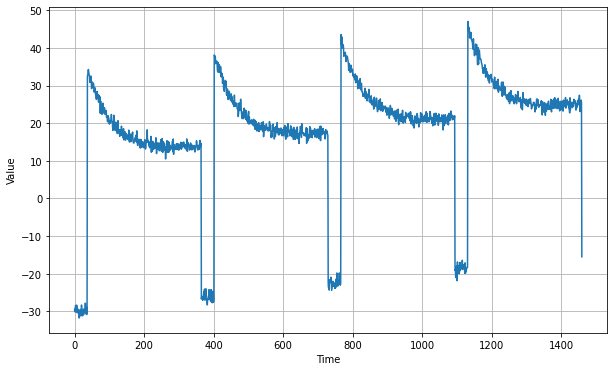

In [16]:
def plot_figure(time,series,format='-',start=0,end=None):
  plt.plot(time[start:end],series[start:end])
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)
def trend(time, slope):
  return slope*time

def seasonal_pattern(season_time):
  return np.where(season_time<0.1, np.cos(7*np.pi), 1/np.exp(5.0*season_time))

def seasonality(time,period,amplitude=1,phase=0):
  season_time = ((time + phase)%period) /period
  return amplitude*seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time))*noise_level

time = np.arange(4*365+1, dtype="float32")
baseline = 10
amplitude = 40
slope=0.01
noise_level=2
series = trend(time, 0.1)
series = baseline + trend(time,slope) + seasonality(time,period=365)*amplitude
series += noise(time,seed=42)
plt.figure(figsize=(10,6))
plot_figure(time,series)



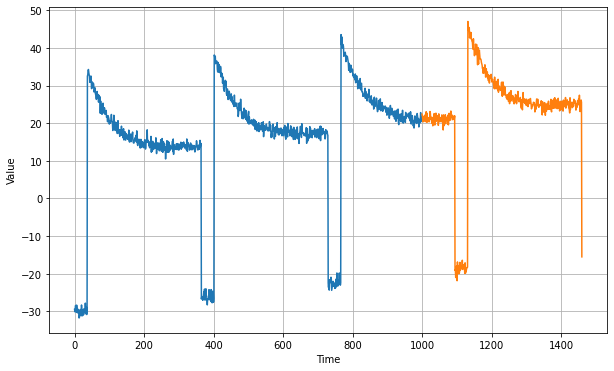

In [18]:
split_time = 1000
train_time=time[:split_time]
test_time = time[split_time:]
x_train = series[:split_time]
x_test = series[split_time:]
plt.figure(figsize=(10,6))
plot_figure(train_time,x_train)
plot_figure(test_time, x_test)

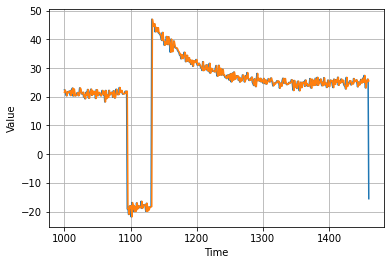

In [22]:
naive_forecast = series[split_time-1:-1]
plot_figure(test_time,x_test)
plot_figure(test_time,naive_forecast)

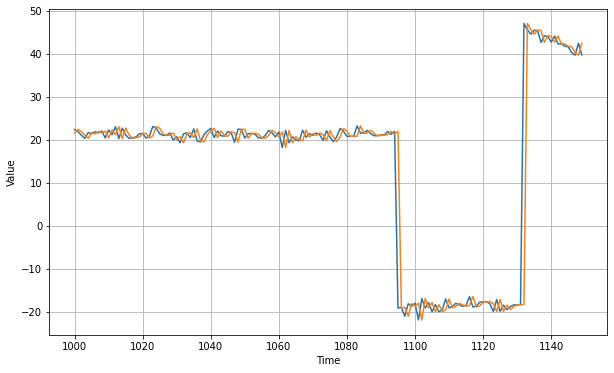

In [26]:
plt.figure(figsize=(10,6))
plot_figure(test_time[:150],x_test[:150])
plot_figure(test_time[:150],naive_forecast[:150])

In [31]:
mse = np.square(x_test-naive_forecast).mean()
ae = np.abs(x_test-naive_forecast).mean()
print(mse)
print(ae)

18.670063
1.4610392


461
135.92414500307103
4.62980391766245


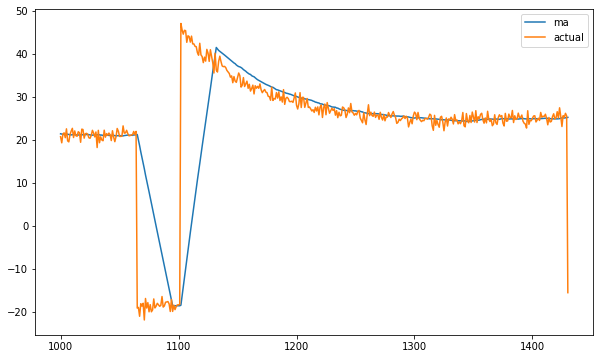

In [63]:
def moving_average(s, window_size):
  L = len(s)-window_size
  ma = np.zeros(L)
  for i in range(L):
    ma[i] = s[i:i+window_size].mean()
  return ma
window_size = 30
print(len(test_time))
plt.figure(figsize=(10,6))
plt.plot(test_time[:len(test_time)-window_size],moving_average(x_test,window_size)) # Average of the past 'window_size' samples
plt.plot(test_time[:len(test_time)-window_size],x_test[window_size:])     # The current value
plt.legend(['ma','actual'])
error = x_test[window_size:] - moving_average(x_test,window_size)
mse = (np.square(error)).mean()
ae = np.abs(error).mean()
print(mse)
print(ae)

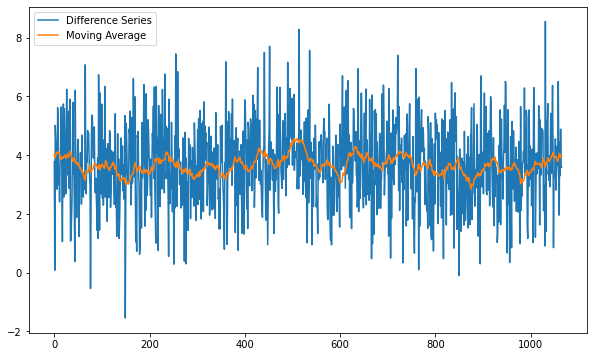

In [68]:
ds = series[365:]-series[:-365]
ma = moving_average(ds,30)
a = range(len(ds)-30)
plt.figure(figsize=(10,6))
plt.plot(a,ds[30:])
plt.plot(a, ma)
plt.legend(['Difference Series','Moving Average'])

13.54608051071896
3.668853358748259


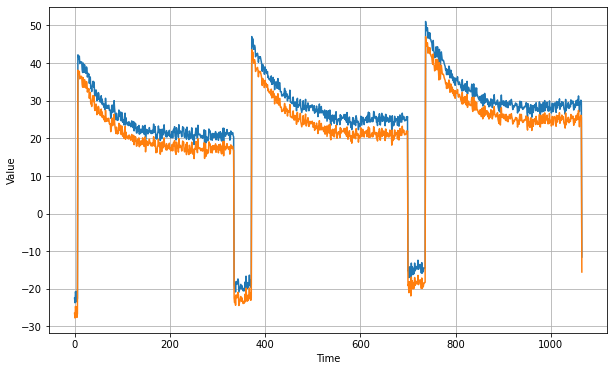

In [83]:

plt.figure(figsize=(10,6))
plt.plot(ma+series[395:])
plt.plot(series[395:])
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Value')
print(keras.metrics.mean_squared_error(series[395:],ma+series[395:]).numpy())
print(keras.metrics.mean_absolute_error(series[395:],ma+series[395:]).numpy())

126.90434702683602
6.937132904831047


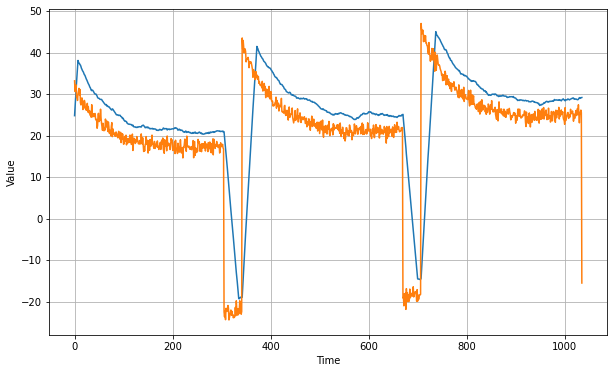

In [85]:
x=series[395:]
ma_past = moving_average(x,30)
plt.figure(figsize=(10,6))
plt.plot(ma[30:]+ma_past)
plt.plot(series[425:])
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Value')
print(keras.metrics.mean_squared_error(series[425:],ma[30:]+ma_past).numpy())
print(keras.metrics.mean_absolute_error(series[425:],ma[30:]+ma_past).numpy())